<a href="https://colab.research.google.com/github/patricktapajos/pos-ciencia-dados/blob/master/mod03-estatistica/aula02/exercicio_distribuicoes_continuas_e_inferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from scipy.stats import binom, nbinom, poisson, uniform, expon, norm , t
import statistics as st
import statsmodels.stats.proportion as prop
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random

### Q1. Um ponto é escolhido ao acaso no segmento de reta [1,4]. Qual a probabilidade de que o ponto escolhido esteja entre 0,5 e 2,5?

In [32]:
#P( 0,5<= x >= 2,5)

# A=1
# B=4
# a = 0.5
# b = 2.5
# fx = 1/(B-A)
# P = fx*(b-a)
# OU

P = uniform.cdf(2.5, 0.5, 3)
print("A probabilidade é", P)

A probabilidade é 0.6666666666666666


### Q2. O tempo de vida (em horas) de um transístor é uma variável aleatória T com distribuição exponencial. O tempo médio de vida do transístor é de 500 horas. Qual a probabilidade de o transístor durar entre 300 e 1000 horas?

In [48]:
# Descobrir pq o lambda é 1/500
scale = 500
expon.cdf(1000,scale=scale)-expon.cdf(300,scale=scale) 

0.4134763528574137

### Q3. Se as interrupções no suprimento de energia elétrica ocorrem segundo uma distribuição de Poisson com a média de uma interrupção por mês (quatro semanas). Qual a probabilidade de que entre duas interrupções consecutivas ocorram em um intervalo de menos de uma semana?

In [76]:
scale = 4
round(expon.cdf(1,scale=scale), 4)

0.2212

### Q4. As notas de uma prova de estatística em uma turma do ensino superior são normalmente distribuídas com média 6,0 e variância 16,0. Qual a probabilidade de um aluno tirar uma nota entre 7,0 e 8,0?

In [81]:
media = 6
variancia = 16
dp = np.sqrt(variancia)
norm.cdf(8,6,dp)-norm.cdf(7,6,dp)

0.09275613559108942

### Q5. Uma enchedora automática de garrafas de refrigerante esta regulada para que o volume médio de líquido em cada garrafa seja de 1000 cm3 e o desvio-padrão de 10 cm3. Qual deve ser a medida mínima para um técnico escolher 5% das garrafas que não completaram 1000 cm3?

In [82]:
norm.ppf(0.05,1000,10)

983.5514637304852

### Q6. Existe vários algoritmos computacionais que permitem gerar números aleatórios (ou, mais apropriadamente, pseudo-aleatórios) no intervalo [0,1], com distribuição uniforme. Considere a geração de 100 números (X1, X2, ...,X100) desta forma. Qual é o valor da média e da variância de Xi?

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


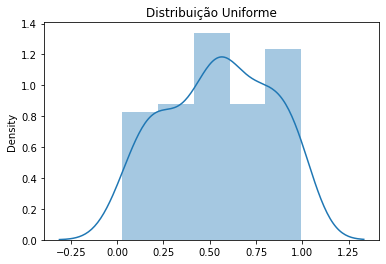

Média:  0.55
Variância: 0.08
Desvio-padrão: 0.28


In [104]:
dados = random.uniform(0,1, size=100)
sns.distplot(dados, kde=True)
plt.title('Distribuição Uniforme')
plt.show()


print("Média: ", round(st.mean(dados), 2))
print("Variância:", round(st.variance(dados), 2))
print("Desvio-padrão:", round(st.stdev(dados), 2))

### Q7. Com o objetivo de avaliar a confiabilidade de um novo sistema de transmissão de dados, torna-se necessário verificar a proporção de bits transmitidos com erro em cada lote de 100 Mb. Considere que seja tolerável um erro amostral de máximo de 2% e que em sistemas similares a taxa de erro na transmissão é de 10%. Qual deve ser o tamanho da amostra ao nível de 95%?

In [113]:
z = 0.975
taxa_sucesso = 0.9
taxa_fracasso = 0.1
erro_amostral = 0.02
( (norm.ppf(z)**2)*(taxa_sucesso*taxa_fracasso) )/(erro_amostral**2)
#ou
#(1.96**2*0.1*0.9)/(0.02**2)

# Para confirmar, vamos calcular o erro amostral com base neste quantitativo
#1.96*np.sqrt(0.1*0.9/864)

864.3282346561782

### Q8. Em 400 simulações de determinado equipamento, foram obtidos 80 sucessos. Qual o intervalo de confiança ao nível de 95% para a proporção de sucessos.

In [119]:
#percentagem de sucesso: 0,20 ou 20%
# n = 400
# z = 1.96
# taxa_sucesso = 0.2
# taxa_fracasso = 0.8
# erro = z * np.sqrt((taxa_sucesso*taxa_fracasso)/n)
# inf = taxa_sucesso - erro
# sup = taxa_sucesso + erro

inf, sup = prop.proportion_confint (80, 400, alpha=0.05, method='normal')

print ('Limite inferior:', round(inf,2))
print ('Limite superior:', round(sup,2))

Limite inferior: 0.16
Limite superior: 0.24


### Q9. Do total de válvulas fabricadas por uma companhia retira-se uma amostra de 30 válvulas, e obtém-se a vida média de 800h com desvio-padrão de 100h. Qual o intervalo de confiança de 99% para a vida média da população?

In [136]:
#percentagem de sucesso: 0,20 ou 20%
n = 30
media = 800
dp = 100
#grau_liberdade = n-1
ic = 0.99
#alpha = 2.756 # gl(parte inteira (n-1), parte quebrada (1-IC99%/2 , sendo 2 pq tem negativo e positivo)) =  29,005 na tabela de distribuição de student

#erro = alpha * dp/np.sqrt(n)
#inf = media - erro
#sup = media + erro
# ou 
inf,sup = t.interval(ic, n-1, loc=media, scale=dp/np.sqrt(n))
print ('Limite inferior:', round(inf,2))
print ('Limite superior:', round(sup,2))

Limite inferior: 749.68
Limite superior: 850.32


### Q10. De uma distribuição normal com σ2 = 1,96, obteve-se a seguinte amostra: 25,2; 26,0; 26,4; 27,1; 28,2; 28,4. Determinar o intervalo de confiança para a média da população, sendo α = 5%.

In [166]:
x = [25.2, 26, 26.4, 27.1, 28.2, 28.4]

n = len(x)
media = st.mean(x)
dp = np.sqrt(np.sqrt(st.stdev(x)))
# tg = 2.571
ic = 0.95

# erro = tg * dp/np.sqrt(n)
# inf = media - erro
# sup = media + erro
# ou

inf,sup = t.interval(ic, n-1, loc=media, scale=dp/np.sqrt(n))
print ('Limite inferior:', round(inf,2))
print ('Limite superior:', round(sup,2))

Limite inferior: 25.77
Limite superior: 28.0
